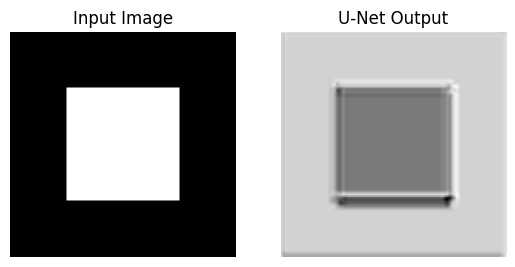

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# --- Dummy Image ---
# 128x128 mit zwei Bereiche
image = np.zeros((128, 128), dtype=np.float32)
image[32:96, 32:96] = 1.0  # quadratisches Objekt

plt.subplot(1, 2, 1)
plt.title("Input Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

# --- Einfacher Mini U-Net ---
class MiniUNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.enc1 = nn.Conv2d(1, 8, 3, padding=1)
        self.enc2 = nn.Conv2d(8, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2)
        self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=False)
        self.dec1 = nn.Conv2d(16, 8, 3, padding=1)
        self.out = nn.Conv2d(8, 1, 1)

    def forward(self, x):
        x1 = F.relu(self.enc1(x))
        x2 = F.relu(self.enc2(self.pool(x1)))
        x3 = F.relu(self.dec1(self.up(x2)))
        x4 = torch.sigmoid(self.out(x3))
        return x4

# --- Modell und Input vorbereiten ---
model = MiniUNet()
model.eval()  # eval mode, keine Gradienten nötig

input_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(0)  # [B, C, H, W]
with torch.no_grad():
    output = model(input_tensor).squeeze().numpy()

# --- Ergebnis anzeigen ---
plt.subplot(1, 2, 2)
plt.title("U-Net Output")
plt.imshow(output, cmap='gray')
plt.axis('off')

plt.show()
